In [1]:
%pip install binarytree
%pip install anytree
import time
import matplotlib.pyplot as plt
from binarytree import bst
from anytree import Node, RenderTree
import random

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 2.0 MB/s eta 0:00:00


In [2]:
def bfsTraversal (root):
  if root is None:
    return []

  path = []
  queue = [root]

  while queue:
    current_node = queue.pop(0)
    path.append (current_node.value)
    if current_node.left:
      queue.append(current_node.left)
    if current_node.right:
      queue.append(current_node.right)

  return path

In [3]:
def dfsTraversal(root):
  if root is None:
        return []

  path = []
  stack = [root]

  while stack:
      current_node = stack.pop()
      path.append(current_node.value)

        # We push the right child first so that the left child is processed first (LIFO principle of a stack).
      if current_node.right:
          stack.append(current_node.right)
      if current_node.left:
          stack.append(current_node.left)

  return path

In [4]:
def create_anytree_from_binarytree(binary_root):
    if binary_root is None:
        return None

    any_root = Node(binary_root.value)
    nodes_to_process = [(binary_root, any_root)]

    while nodes_to_process:
        binary_node, any_node = nodes_to_process.pop(0)

        if binary_node.left:
            left_any_node = Node(binary_node.left.value, parent=any_node)
            nodes_to_process.append((binary_node.left, left_any_node))

        if binary_node.right:
            right_any_node = Node(binary_node.right.value, parent=any_node)
            nodes_to_process.append((binary_node.right, right_any_node))

    return any_root

--- Example Tree Visualization (for a 10-node tree) ---
BinaryTree representation:

      4____
     /     \
  __3     __8
 /       /   \
1       5     10
 \       \      \
  2       6      12


AnyTree representation:
4
├── 3
│   └── 1
│       └── 2
└── 8
    ├── 5
    │   └── 6
    └── 10
        └── 12

--- Traversal Paths ---
BFS Path: [4, 3, 8, 1, 5, 10, 2, 6, 12]
DFS Path: [4, 3, 1, 2, 8, 5, 6, 10, 12]


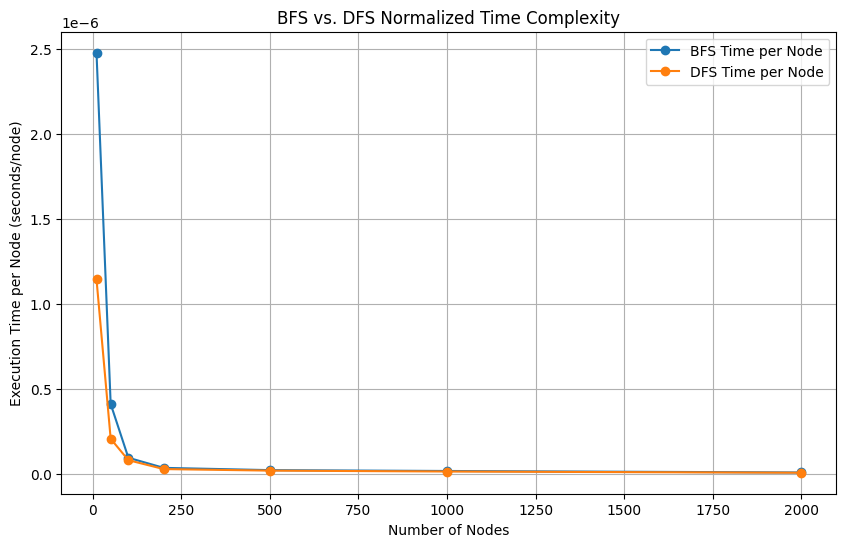

In [5]:
#Visulization
if __name__ == "__main__":
    # Define a range of tree sizes to test
    tree_sizes = [10, 50, 100, 200, 500, 1000, 2000]

    # Lists to store execution times
    bfs_times = []
    dfs_times = []

    for size in tree_sizes:
        # Generate a random list of integers for the tree
        values = random.sample(range(1, size * 2), size) # Generate unique random values

        # Generate a random binary search tree from the list of values
        root_node = bst() # Generate a random BST


        # --- Apply BFS and record time ---
        start_time_bfs = time.time()
        bfs_path = bfsTraversal(root_node)
        end_time_bfs = time.time()
        bfs_duration = end_time_bfs - start_time_bfs
        bfs_times.append(bfs_duration)

        # --- Apply DFS and record time ---
        start_time_dfs = time.time()
        dfs_path = dfsTraversal(root_node)
        end_time_dfs = time.time()
        dfs_duration = end_time_dfs - start_time_dfs
        dfs_times.append(dfs_duration)

    # Example visualization for a smaller tree (e.g., 10 nodes)
    print("--- Example Tree Visualization (for a 10-node tree) ---")
    small_tree_size = 10
    small_tree_values = random.sample(range(1, small_tree_size * 2), small_tree_size)
    small_tree_root = bst() # Generate a random BST

    print("BinaryTree representation:")
    print(small_tree_root)
    print("\nAnyTree representation:")
    any_root = create_anytree_from_binarytree(small_tree_root)
    for pre, fill, node in RenderTree(any_root):
        print(f"{pre}{node.name}")

    print("\n--- Traversal Paths ---")
    print("BFS Path:", bfsTraversal(small_tree_root))
    print("DFS Path:", dfsTraversal(small_tree_root))

    # --- Plot the results using Matplotlib ---
    plt.figure(figsize=(10, 6))
    plt.plot(tree_sizes, [t/size for t, size in zip(bfs_times, tree_sizes)], marker='o', label='BFS Time per Node')
    plt.plot(tree_sizes, [t/size for t, size in zip(dfs_times, tree_sizes)], marker='o', label='DFS Time per Node')
    plt.title('BFS vs. DFS Normalized Time Complexity')
    plt.xlabel('Number of Nodes')
    plt.ylabel('Execution Time per Node (seconds/node)')
    plt.legend()
    plt.grid(True)
    plt.show()